In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('./')

In [2]:
# General imports
import json
import os
from qiskit import QuantumCircuit
import numpy as np
from dataclasses import dataclass
from enum import auto, Enum
import matplotlib.pyplot as plt

In [3]:
from component.sup_sys.algorithm_loader import load_algorithms
load_algorithms()

,Algorithm Type,Algorithm
0,ilp,MILQ_extend
1,ilp,MILQ_simple
2,ai,(none)
3,heuristic,(none)


In [4]:
from component.a_backend.fake_backend import *
from component.sup_sys.backend_loader import load_backends
backendlist = load_backends()
print(backendlist)

{'FakeAlgiers': 27, 'FakeAlmadenV2': 20, 'FakeArmonkV2': 1, 'FakeAthensV2': 5, 'FakeAuckland': 27, 'FakeBelemV2': 5, 'FakeBoeblingenV2': 20, 'FakeBogotaV2': 5, 'FakeBrisbane': 127, 'FakeBrooklynV2': 65, 'FakeBurlingtonV2': 5, 'FakeCairoV2': 27, 'FakeCambridgeV2': 28, 'FakeCasablancaV2': 7, 'FakeCusco': 127, 'FakeEssexV2': 5, 'FakeFractionalBackend': 5, 'FakeGeneva': 27, 'FakeGuadalupeV2': 16, 'FakeHanoiV2': 27, 'FakeJakartaV2': 7, 'FakeJohannesburgV2': 20, 'FakeKawasaki': 127, 'FakeKolkataV2': 27, 'FakeKyiv': 127, 'FakeKyoto': 127, 'FakeLagosV2': 7, 'FakeLimaV2': 5, 'FakeLondonV2': 5, 'FakeManhattanV2': 65, 'FakeManilaV2': 5, 'FakeMarrakesh': 156, 'FakeMelbourneV2': 15, 'FakeMontrealV2': 27, 'FakeMumbaiV2': 27, 'FakeNairobiV2': 7, 'FakeOsaka': 127, 'FakeOslo': 7, 'FakeOurenseV2': 5, 'FakeParisV2': 27, 'FakePeekskill': 27, 'FakePerth': 7, 'FakePoughkeepsieV2': 20, 'FakePrague': 33, 'FakeQuebec': 127, 'FakeQuitoV2': 5, 'FakeRochesterV2': 53, 'FakeRomeV2': 5, 'FakeSantiagoV2': 5, 'FakeShe

{'fake_belem': <qiskit_ibm_runtime.fake_provider.backends.belem.fake_belem.FakeBelemV2 object at 0x791c615aefb0>, 'fake_manila': <qiskit_ibm_runtime.fake_provider.backends.manila.fake_manila.FakeManilaV2 object at 0x791c615ac9a0>}
<class 'dict'>
['fake_belem', 'fake_manila']


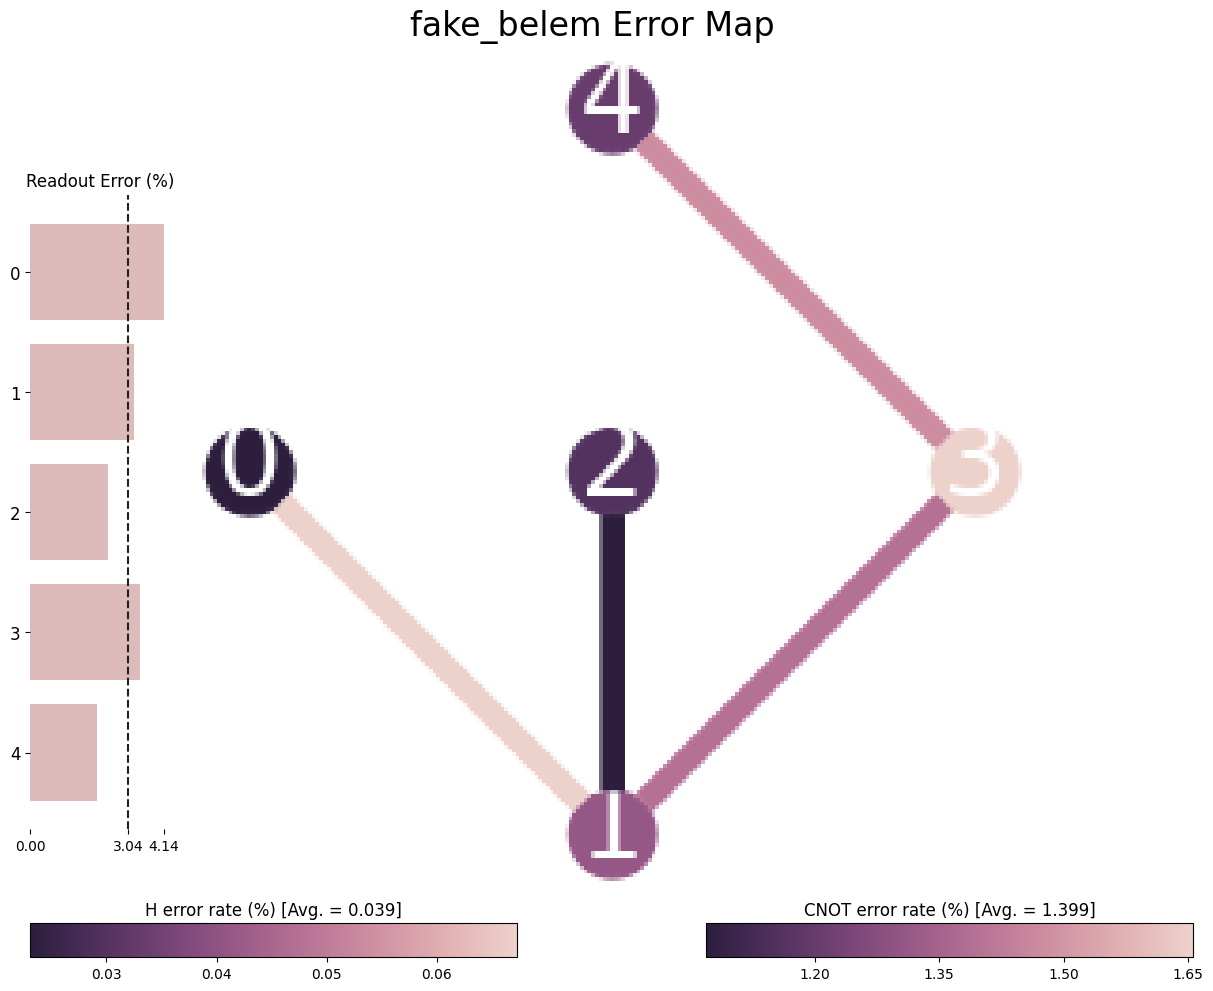

In [79]:
import matplotlib.pyplot as plt
from component.a_backend import fake_backend
from qiskit.visualization import plot_error_map

machines = {}

backend0 = FakeBelemV2()
backend0Name = backend0.name
backend1 = FakeManilaV2()
backend1Name = backend1.name

machines[backend0Name] = backend0
machines[backend1Name] = backend1
print(machines)

print(type(machines))
print(list(machines.keys()))
plot_error_map(machines[backend0Name])

In [63]:
print(machines['fake_belem'].num_qubits)

5


Show map backend

# Generate the problem

Create benchmark

In [59]:
# 1. Number of Jobs in the batch
jobs = {"1": 2, "2": 3, "3": 5, "4": 2 }
from component.b_benchmark.mqt_tool import benchmark_circuit
from component.sup_sys.job_info import JobInfo

origin_job_info = {}

for job_name, num_qubits in jobs.items():
    circuit = benchmark_circuit(name_algorithm="str", circuit_size=num_qubits)
    origin_job_info[job_name] = JobInfo(
        job_name=job_name,
        qubits=circuit.num_qubits,
        machine=None,  # Placeholder for machine name
        capacity_machine=0,  # Placeholder for machine capacity
        start_time=0.0,  # Placeholder for start time
        duration=0.0,  # Placeholder for duration
        end_time=0.0,  # Placeholder for end time
        childrenJobs=None,  # Placeholder for child jobs
        circuit=circuit,
        result_cut=None,  # Placeholder for result cut
    )

print(origin_job_info, "\n")

{'1': JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='1', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f94b0>, qubits=2, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None), '2': JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='2', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f93f0>, qubits=3, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None), '3': JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='3', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619fb700>, qubits=5, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None), '4': JobInfo(job_id='f92b4d28-f9fb-4b3a

Cutting circuit

In [60]:
# cutting each job into 2 parts in dict_job_info
process_job_info = origin_job_info.copy()
print(process_job_info, "\n")

{'1': JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='1', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f94b0>, qubits=2, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None), '2': JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='2', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f93f0>, qubits=3, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None), '3': JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='3', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619fb700>, qubits=5, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None), '4': JobInfo(job_id='f92b4d28-f9fb-4b3a

cal value from backend

In [61]:
# Cutting the jobs into two parts with condition in process_job_info
from component.c_circuit_work.cutting.width_c import *

for job_name, job_info in process_job_info.items():
    if job_info.qubits == 6:
        job_info.childrenJobs = []
        num_of_part = (job_info.qubits +4 ) // 5
        cut_name = "AABBB"  # Example partition labels
        observable = SparsePauliOp(["ZZIII", "IZZII", "-IIZZZ", "XIXZZ", "ZIZZZ", "IXIXZ"])
        result_cut = gate_to_reduce_width(job_info.circuit, cut_name, observable)
        for i, (subcircuit_name, subcircuit) in enumerate(result_cut.subcircuits.items()):
            job_info.childrenJobs.append(
                JobInfo(
                    job_name=f"{job_name}_{i}",
                    qubits=subcircuit.num_qubits,
                    machine=None,
                    capacity_machine=0,
                    start_time=0.0,
                    duration=0.0,
                    end_time=0.0,
                    childrenJobs=None,
                    circuit=subcircuit,
                    result_cut=None,
                )
            )
        job_info.result_cut = result_cut
    # print job_info.circuit
    print(job_name)
    print(job_info)

1
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='1', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f94b0>, qubits=2, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None)
2
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='2', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f93f0>, qubits=3, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None)
3
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='3', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619fb700>, qubits=5, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None)
4
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd629

In [62]:

# 4. Run subexperiments on a quantum backend
for job_name, job_info in process_job_info.items():
    print("Job Name:", job_name)
    if job_info.result_cut is not None:
        result_cut = job_info.result_cut
        backend = list(machines.values())[0] # Example backend
        results = run_subexperiments(result_cut.subexperiments, backend)
        reconstructed_expval, exact_expval, error_estimation, relative_error_estimation = compute_expectation_value(results, result_cut.coefficients, result_cut.subobservables, result_cut.observable, job_info.circuit)
        print_results(reconstructed_expval, exact_expval, error_estimation, relative_error_estimation)

Job Name: 1
Job Name: 2
Job Name: 3
Job Name: 4


Apply scheduling to the benchmark circuits as require ment

In [63]:
# Get the job for run scheduler

scheduler_job = {}
def get_scheduler_jobs(job_info):
    if job_info.childrenJobs is None:
        return {job_info.job_name: job_info}
    scheduler_jobs = {}
    for child_job in job_info.childrenJobs:
        scheduler_jobs.update(get_scheduler_jobs(child_job))
    return scheduler_jobs

for job_name, job_info in process_job_info.items():
    scheduler_job.update(get_scheduler_jobs(job_info))
    
print("Scheduler Jobs:")
for job_name, job_info in scheduler_job.items():
    print(job_name)
    print(job_info)

Scheduler Jobs:
1
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='1', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f94b0>, qubits=2, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None)
2
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='2', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f93f0>, qubits=3, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None)
3
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='3', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619fb700>, qubits=5, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, fidelity=None)
4
JobInfo(job_id='f92b4d28-f9fb-4b3a

In [64]:
# Setup
bigM = 1000000
timesteps = 2**5
jobs = ["0"] + list(process_job_info.keys())
job_capacities = {"0": 0}
job_capacities.update({job_name: job_info.qubits for job_name, job_info in process_job_info.items()})
machines_ilp = list(machines.keys())  # Keep machines as a list of keys
machine_capacities_ilp = {machine_name: machines[machine_name].num_qubits for machine_name in machines}
print("Jobs:", jobs)
print("Job Capacities:", job_capacities)
print("Machines:", machines_ilp)
print("Machine Capacities:", machine_capacities_ilp)
from component.d_scheduling.algorithm.ilp.MILQ_extend import MILQ_extend_implementation
# Scheduler
MILQ_extend_implementation.example_problem(bigM, timesteps, "component/d_scheduling/algorithm/ilp/MILQ_extend/MILQ_extend_result", jobs, job_capacities, machines_ilp, machine_capacities_ilp)

Jobs: ['0', '1', '2', '3', '4']
Job Capacities: {'0': 0, '1': 2, '2': 3, '3': 5, '4': 2}
Machines: ['fake_belem', 'fake_manila']
Machine Capacities: {'fake_belem': 5, 'fake_manila': 5}
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/trieu/anaconda3/envs/squan/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/5910e820de7d4dadb41a210703b20dc1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/5910e820de7d4dadb41a210703b20dc1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 710 COLUMNS
At line 4649 RHS
At line 5355 BOUNDS
At line 5860 ENDATA
Problem MODEL has 705 rows, 514 columns and 2929 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 10 - 0.00 seconds
Cgl0002I 8 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 495 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bound

Saved job data to: /home/trieu/D/Quantum_Repo/Quantum_Simulation_Scheduling/component/d_scheduling/algorithm/ilp/MILQ_extend/job_data.txt
Saved job data as JSON to: /home/trieu/D/Quantum_Repo/Quantum_Simulation_Scheduling/component/d_scheduling/algorithm/ilp/MILQ_extend/job_data.json
  job  qubits      machine  capacity  start   end  duration
0   1       2  fake_manila         5    0.0   5.0       5.0
1   2       3  fake_manila         5    0.0  11.0      11.0
2   3       5   fake_belem         5    0.0  14.0      14.0
3   4       2  fake_manila         5    6.0  17.0      11.0
Saved plot to: /home/trieu/D/Quantum_Repo/Quantum_Simulation_Scheduling/component/d_scheduling/algorithm/ilp/MILQ_extend/MILQ_extend_result_plot.pdf


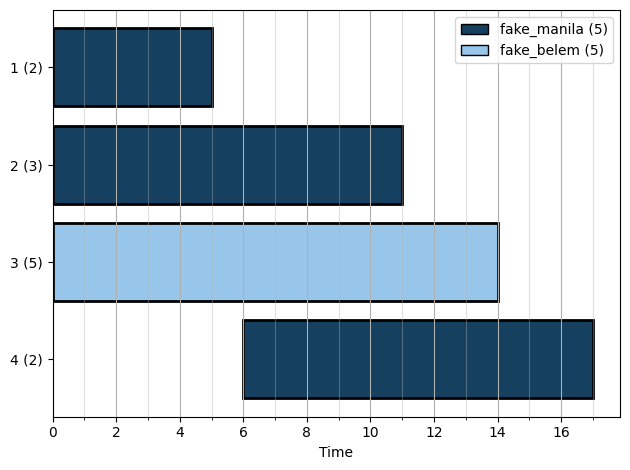

In [140]:
# Visualize
from component.d_scheduling.visualize import ilp

ilp.visualize("component/d_scheduling/algorithm/ilp/MILQ_extend/MILQ_extend_result.json")

In [133]:
from component.d_scheduling.analyze import analyze_cal

data = analyze_cal.load_job_data("component/d_scheduling/algorithm/ilp/MILQ_extend/job_data.txt")
print(data)

for job_data in data:
    job_name = job_data['job']
    if job_name in scheduler_job:
        scheduler_job[job_name].qubits = job_data['qubits']
        scheduler_job[job_name].machine = job_data['machine']
        scheduler_job[job_name].capacity_machine = job_data['capacity']
        scheduler_job[job_name].start_time = job_data['start']
        scheduler_job[job_name].duration = job_data['duration']
        scheduler_job[job_name].end_time = job_data['end']

print("Scheduler Jobs with Scheduling Information:")
for job_name, job_info in scheduler_job.items():
    print(job_name)
    print(job_info)


[{'job': '1', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 5.0, 'duration': 5.0}, {'job': '2', 'qubits': 3, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 11.0, 'duration': 11.0}, {'job': '3', 'qubits': 5, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.0, 'end': 14.0, 'duration': 14.0}, {'job': '4', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 6.0, 'end': 17.0, 'duration': 11.0}]
Scheduler Jobs with Scheduling Information:
1
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='1', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c619f94b0>, qubits=2, machine='fake_manila', capacity_machine=5, start_time=0.0, duration=5.0, end_time=5.0, childrenJobs=None, result_cut=None, transpiled_circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x791c615d5f00>, fidelity=None)
2
JobInfo(job_id='f92b4d28-f9fb-4b3a-b20c-f366cdd62906', job_name='2', circuit=<qiskit.circuit.quantumcircuit.Quan

In [67]:
from qiskit import QuantumCircuit, transpile
# Transpile circuits for all scheduled jobs
for job_id, job in scheduler_job.items():
    backend = machines.get(job.machine)
    if backend:
        # Perform transpilation
        job.transpiled_circuit = transpile(job.circuit, backend, scheduling_method='alap', layout_method='trivial')
        print(f"Transpiled circuit for job {job_id} on machine {job.machine}:")
    else:
        print(f"No backend found for machine {job.machine}. Skipping job {job_id}.")

Transpiled circuit for job 1 on machine fake_manila:
Transpiled circuit for job 2 on machine fake_manila:
Transpiled circuit for job 3 on machine fake_belem:
Transpiled circuit for job 4 on machine fake_manila:


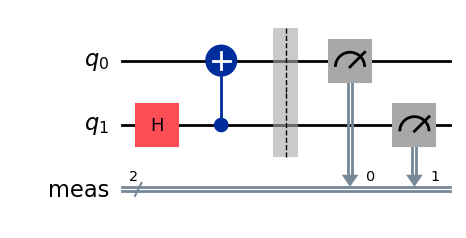

In [76]:
scheduler_job['1'].circuit.draw('mpl')

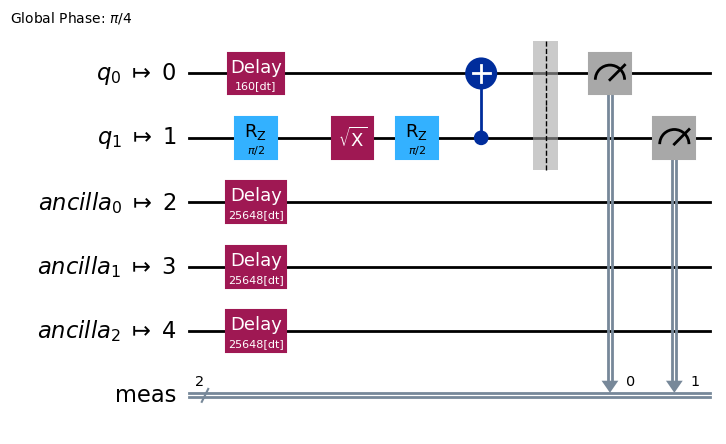

In [74]:
scheduler_job['1'].transpiled_circuit.draw('mpl')

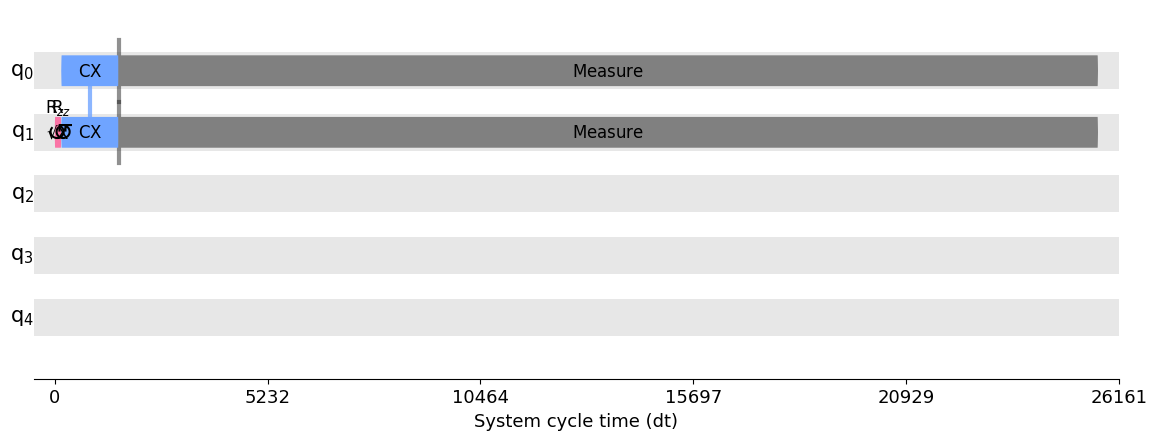

In [86]:
from qiskit.visualization.timeline import draw, IQXDebugging
draw(scheduler_job['1'].transpiled_circuit, target=machines['fake_belem'].target)


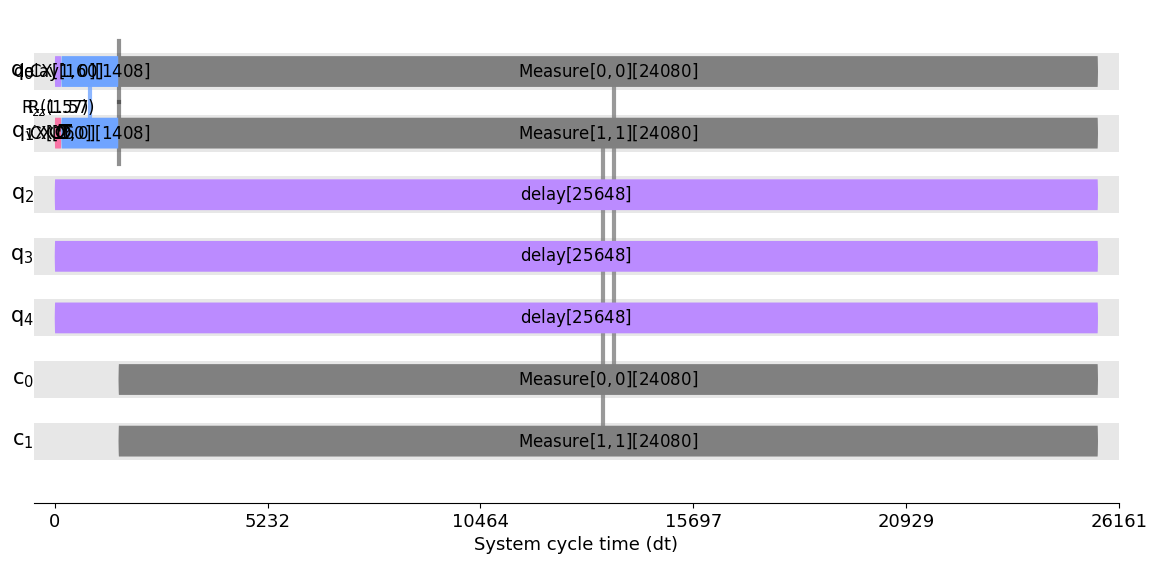

In [87]:
draw(scheduler_job['1'].transpiled_circuit, style=IQXDebugging(), target=machines['fake_belem'].target)

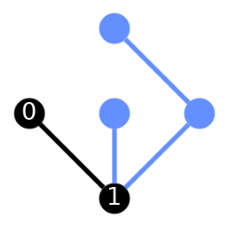

In [78]:
# after have the circuit we connect to
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(scheduler_job['1'].transpiled_circuit, machines['fake_belem'])

In [123]:
print(data)

[{'job': '1', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 25648.0, 'duration': 25648}, {'job': '2', 'qubits': 3, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 27920.0, 'duration': 27920}, {'job': '3', 'qubits': 5, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.0, 'end': 39280.0, 'duration': 39280}, {'job': '4', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 25648.0, 'end': 51296.0, 'duration': 25648}]


# Allow multithreading

In [134]:
import random

# Define the jobs
jobs = data.copy()

# Generate unique execution times
def get_the_duration_from_transpiled_circuit(circuit):
    return circuit.duration

# Simulate the scheduling with parallel execution support
def simulate_scheduling(jobs):
    machine_schedules = {'fake_belem': [], 'fake_manila': []}  # Track active jobs for each machine
    jobs = sorted(jobs, key=lambda x: x['start'])  # Sort jobs by start time
    for job in jobs:
        machine = job['machine']
        base_duration = job['duration']
        unique_duration = get_the_duration_from_transpiled_circuit(scheduler_job[job['job']].transpiled_circuit)

        # Find the earliest time the job can start
        current_schedule = machine_schedules[machine]
        start_time = job['start']
        
        # Check for parallel execution
        while True:
            # Filter out completed jobs
            active_jobs = [j for j in current_schedule if j['end'] > start_time]
            
            # Calculate total qubits in use
            total_qubits_in_use = sum(j['qubits'] for j in active_jobs)
            if total_qubits_in_use + job['qubits'] <= job['capacity']:
                # Enough resources are available
                break
            # Increment start_time to the earliest end time of active jobs
            start_time = min(j['end'] for j in active_jobs)

        # Update job start, end times, and duration
        job['start'] = start_time
        job['end'] = start_time + unique_duration
        job['duration'] = unique_duration

        # Add job to the machine's schedule
        current_schedule.append(job)

    return jobs

# Run the simulation
updated_jobs = simulate_scheduling(jobs)

# Print the updated schedule
for job in updated_jobs:
    print(job)


{'job': '1', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 25648.0, 'duration': 25648}
{'job': '2', 'qubits': 3, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 27920.0, 'duration': 27920}
{'job': '3', 'qubits': 5, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.0, 'end': 39280.0, 'duration': 39280}
{'job': '4', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 25648.0, 'end': 51296.0, 'duration': 25648}


/tmp/ipykernel_385912/598238853.py:8: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  return circuit.duration


# Don't allow multithreading

In [136]:
import random

# Define the jobs
jobs = data.copy()

# Generate unique execution times
def get_the_duration_from_transpiled_circuit(circuit):
    return circuit.duration

# Simulate the scheduling with parallel execution support
# Simulate the scheduling with parallel execution support
def simulate_scheduling(jobs):
    machine_current = {'fake_belem': [], 'fake_manila': []}  # Track active jobs for each machine
    
    ready_queue = {'fake_belem': [], 'fake_manila': []}  # Jobs ready to be executed on each machine
    
    # update job with unique execution times
    for job in jobs:
        job['duration'] = get_the_duration_from_transpiled_circuit(scheduler_job[job['job']].transpiled_circuit)
        job['end'] = job['start'] + job['duration']
    
    # Schedule jobs on each machine
    jobs_QUITO = [job for job in jobs if job['machine'] == 'fake_belem']
    jobs_MANILA = [job for job in jobs if job['machine'] == 'fake_manila']
    
    current_time_QUITO = 0.0
    current_time_BELEM = 0.0
    current_capacity_QUITO = 5
    current_capacity_BELEM = 5
    
    # Schedule jobs on QUITO machine
    while jobs_QUITO:
        # Check if there are any jobs ready to be executed
        for job in jobs_QUITO[:]:  # Iterate over a copy to allow modification
            if job['start'] <= current_time_QUITO and job['qubits'] <= current_capacity_QUITO:
                ready_queue['fake_belem'].append(job)
                current_capacity_QUITO -= job['qubits']
        
        # Execute jobs in the ready queue in parallel
        if ready_queue['fake_belem']:
            max_end_time = current_time_QUITO
            for job in ready_queue['fake_belem']:
                job['start'] = current_time_QUITO
                job['end'] = job['start'] + job['duration']
                max_end_time = max(max_end_time, job['end'])
                current_capacity_QUITO += job['qubits']
                jobs_QUITO.remove(job)
                machine_current['fake_belem'].append(job)
            ready_queue['fake_belem'] = []
            # Move the current time to the end of the last job in parallel
            current_time_QUITO = max_end_time
        else:
            # If no jobs are ready, move to the next time step
            current_time_QUITO += 1.0
        
    # Schedule jobs on BELEM machine
    while jobs_MANILA:
        # Check if there are any jobs ready to be executed
        for job in jobs_MANILA[:]:  # Iterate over a copy to allow modification
            if job['start'] <= current_time_BELEM and job['qubits'] <= current_capacity_BELEM:
                ready_queue['fake_manila'].append(job)
                current_capacity_BELEM -= job['qubits']
        
        # Execute jobs in the ready queue in parallel
        if ready_queue['fake_manila']:
            max_end_time = current_time_BELEM
            for job in ready_queue['fake_manila']:
                job['start'] = current_time_BELEM
                job['end'] = job['start'] + job['duration']
                max_end_time = max(max_end_time, job['end'])
                current_capacity_BELEM += job['qubits']
                jobs_MANILA.remove(job)
                machine_current['fake_manila'].append(job)
            ready_queue['fake_manila'] = []
            # Move the current time to the end of the last job in parallel
            current_time_BELEM = max_end_time
        else:
            # If no jobs are ready, move to the next time step
            current_time_BELEM += 1.0
    
    # Print the final schedule
    print("Final Schedule:")
    return machine_current
        
# Run the simulation
updated_jobs = simulate_scheduling(jobs)
# Print the updated schedule
for machine, scheduled_jobs in updated_jobs.items():
    print(f"Machine {machine}:")
    for job in scheduled_jobs:
        print(job)  

Final Schedule:
Machine fake_belem:
{'job': '3', 'qubits': 5, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.0, 'end': 39280.0, 'duration': 39280}
Machine fake_manila:
{'job': '1', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 25648.0, 'duration': 25648}
{'job': '2', 'qubits': 3, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 27920.0, 'duration': 27920}
{'job': '4', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 27920.0, 'end': 53568.0, 'duration': 25648}


/tmp/ipykernel_385912/1230890670.py:8: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  return circuit.duration


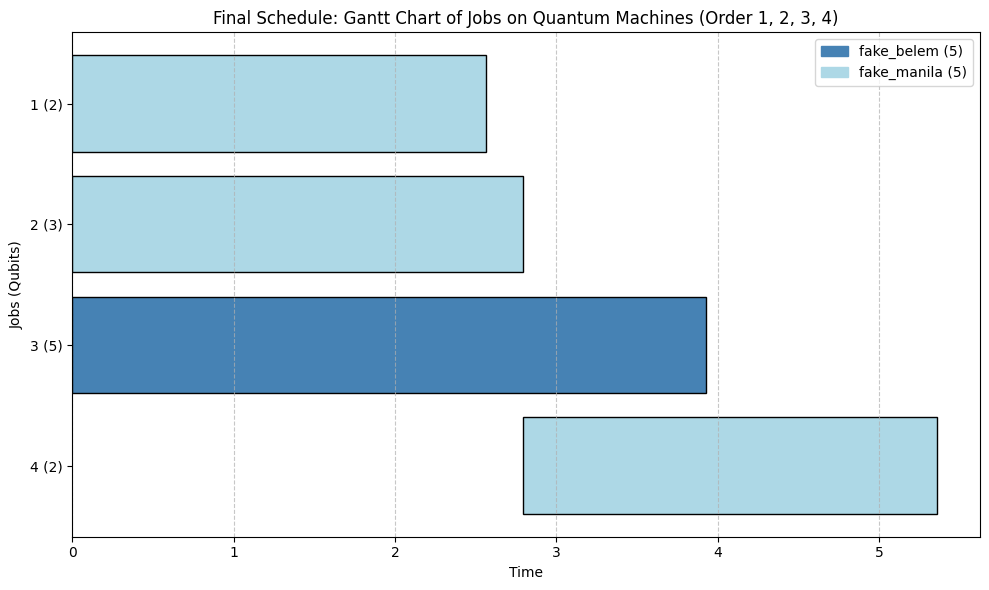

In [138]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data
jobs = [
    {'job': '3', 'qubits': 5, 'machine': 'fake_belem', 'capacity': 5, 'start': 0.0, 'end': 39280.0, 'duration': 39280},
    {'job': '1', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 25648.0, 'duration': 25648},
    {'job': '2', 'qubits': 3, 'machine': 'fake_manila', 'capacity': 5, 'start': 0.0, 'end': 27920.0, 'duration': 27920},
    {'job': '4', 'qubits': 2, 'machine': 'fake_manila', 'capacity': 5, 'start': 27920.0, 'end': 53568.0, 'duration': 25648},
]

# Normalize time to seconds (convert to a smaller scale for visualization)
for job in jobs:
    job['start'] /= 10000
    job['end'] /= 10000
    job['duration'] /= 10000

# Sort jobs by job ID (to enforce vertical order 1, 2, 3, 4)
jobs.sort(key=lambda x: int(x['job']))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each machine
colors = {
    'fake_belem': 'steelblue',
    'fake_manila': 'lightblue'
}

# Creating patches for legend
patches = [
    mpatches.Patch(color='steelblue', label='fake_belem (5)'),
    mpatches.Patch(color='lightblue', label='fake_manila (5)')
]

# Add jobs to the Gantt chart
for job in jobs:
    ax.barh(
        y=f"{job['job']} ({job['qubits']})", 
        width=job['duration'], 
        left=job['start'], 
        color=colors[job['machine']], 
        edgecolor='black'
    )

# Reverse the y-axis
ax.invert_yaxis()

# Add legend
ax.legend(handles=patches, loc='upper right')

# Labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Jobs (Qubits)")
ax.set_title("Final Schedule: Gantt Chart of Jobs on Quantum Machines (Order 1, 2, 3, 4)")

# Grid and layout adjustments
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

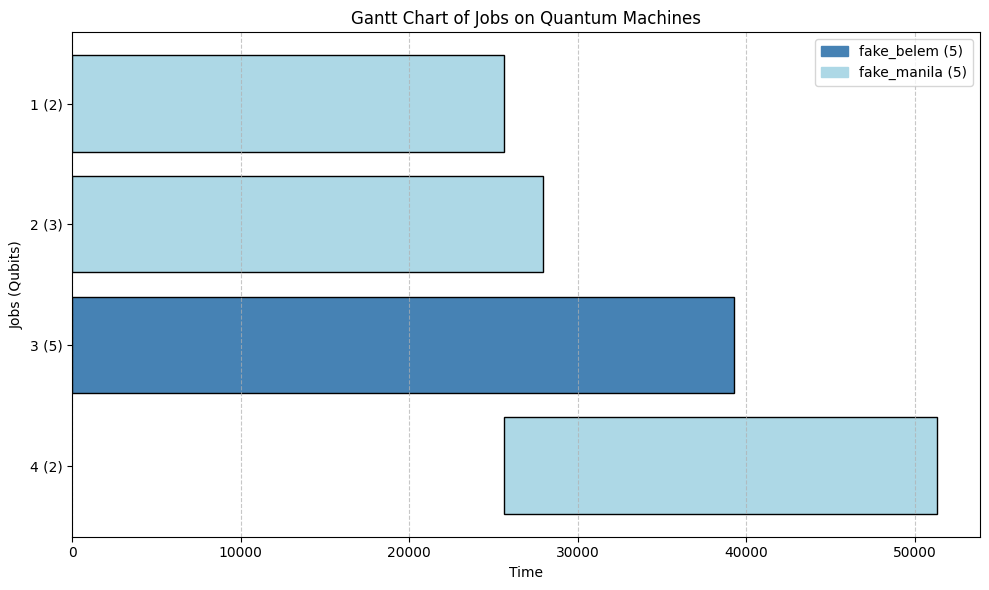

In [135]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each machine
colors = {
    'fake_belem': 'steelblue',
    'fake_manila': 'lightblue'
}

# Creating patches for legend
patches = [
    mpatches.Patch(color='steelblue', label='fake_belem (5)'),
    mpatches.Patch(color='lightblue', label='fake_manila (5)')
]

# Add jobs to the Gantt chart
for i, job in enumerate(updated_jobs):
    ax.barh(
        y=f"{job['job']} ({job['qubits']})", 
        width=job['duration'], 
        left=job['start'], 
        color=colors[job['machine']], 
        edgecolor='black'
    )

# Reverse the y-axis
ax.invert_yaxis()

# Add legend
ax.legend(handles=patches, loc='upper right')

# Labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Jobs (Qubits)")
ax.set_title("Gantt Chart of Jobs on Quantum Machines")

# Grid and layout adjustments
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [139]:
metrics = analyze_cal.calculate_metrics(data)
analyze_cal.print_metrics(metrics)


=== Metrics ===
Waiting Time: 27920.0
Response Time: 146416.0
Makespan: 53568.0
Throughput: 0.0001
Utilization on machine fake_manila: 0.6958
Utilization on machine fake_belem: 0.7333
Average Utilization: 0.7145


Transpile the circuit with pass_manager

Transpile the circuit with transpile only

Plot transpiled circuit in backend

assemble the circuit to have the output in backend and ideal

{'00': 1024}
{'00': 1002, '10': 12, '01': 9, '11': 1}


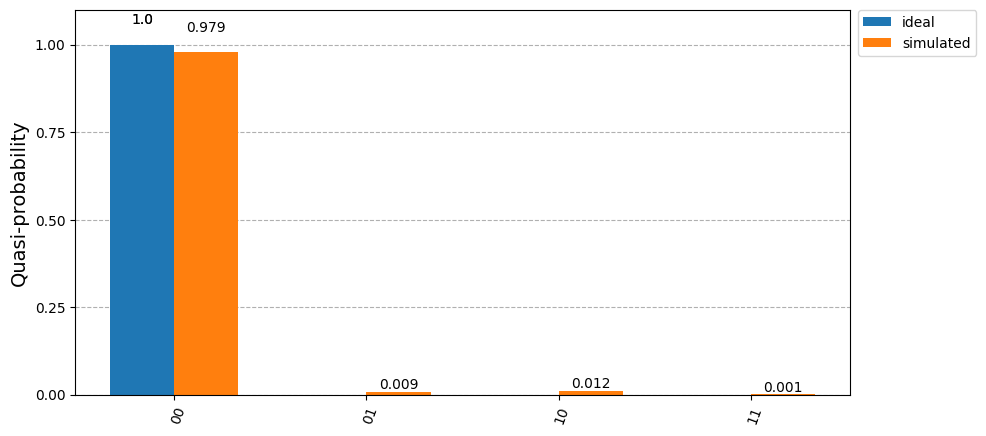

In [ ]:

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
import qiskit.quantum_info as qi
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

resultideal = AerSimulator().run(scheduler_job['1'].circuit,shots = 1024 ).result()
counts_ideal = resultideal.get_counts(scheduler_job['1'].circuit)
print(counts_ideal)

job = SamplerV2(backend0).run([qc_t_cm_lv1],shots=1024)
result_sim = job.result()[0]
counts_sim = result_sim.data.meas.get_counts()
print(counts_sim)

plot_distribution([counts_ideal, counts_sim], legend=['ideal', 'simulated'], figsize=(10, 5))

reconstruct the circuit

In [36]:
from component.f_assemble.assemble_work import fidelity_from_counts

fidelity_val, rho_ideal, rho_sim = fidelity_from_counts(counts_ideal, counts_sim)
print("\nIdeal Density Matrix:")
print(rho_ideal)

print("\nSimulated Density Matrix:")
print(rho_sim)

print("\nFidelity:", fidelity_val)


Ideal Density Matrix:
DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))

Simulated Density Matrix:
DensityMatrix([[0.984375  +0.j, 0.        +0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.00683594+0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.00683594+0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.        +0.j,
                0.00195312+0.j]],
              dims=(2, 2))

Fidelity: 0.9843750000000001


In [73]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution
import qiskit.quantum_info as qi
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService
from component.f_assemble.assemble_work import fidelity_from_counts


# Iterate through all scheduler jobs
fidelity_results = []
for job_name, job_info in scheduler_job.items():
    print(f"Processing Job: {job_name}")

    # Extract job details
    circuit = job_info.circuit
    machine_name = job_info.machine
    backend = machines[machine_name]

    # Transpile circuit for the machine
    transpiled_circuit = transpile(circuit, backend)

    # Run ideal simulation
    result_ideal = AerSimulator().run(circuit, shots=1024).result()
    counts_ideal = result_ideal.get_counts(circuit)

    # Run simulated job
    job = SamplerV2(backend).run([transpiled_circuit], shots=1024)
    result_sim = job.result()
    counts_sim = result_sim[0].data.meas.get_counts()

    # Calculate fidelity
    fidelity_val, rho_ideal, rho_sim = fidelity_from_counts(counts_ideal, counts_sim)
    fidelity_results.append((job_name, fidelity_val))

    # Print results for this job
    print(f"Job {job_name}:")
    print(f"Ideal Counts: {counts_ideal}")
    print(f"Simulated Counts: {counts_sim}")
    print(f"\nIdeal Density Matrix:\n{rho_ideal}")
    print(f"\nSimulated Density Matrix:\n{rho_sim}")
    print(f"\nFidelity: {fidelity_val}\n")

# Plot all fidelities
job_names = [result[0] for result in fidelity_results]
fidelity_values = [result[1] for result in fidelity_results]

print("\nAll Fideltities:")
print(job_names)
print(fidelity_values)

Processing Job: 1
Job 1:
Ideal Counts: {'11': 496, '00': 528}
Simulated Counts: {'11': 465, '00': 526, '01': 14, '10': 19}

Ideal Density Matrix:
DensityMatrix([[0.515625+0.j, 0.      +0.j, 0.      +0.j, 0.      +0.j],
               [0.      +0.j, 0.      +0.j, 0.      +0.j, 0.      +0.j],
               [0.      +0.j, 0.      +0.j, 0.      +0.j, 0.      +0.j],
               [0.      +0.j, 0.      +0.j, 0.      +0.j, 0.484375+0.j]],
              dims=(2, 2))

Simulated Density Matrix:
DensityMatrix([[0.51367188+0.j, 0.        +0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.01367188+0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.01855469+0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.        +0.j,
                0.45410156+0.j]],
              dims=(2, 2))

Fidelity: 0.967550773739724

Processing Job: 2
Job 2:
Ideal Counts: {'111': 512, '000': 51

In [84]:
from qiskit import transpile
from qiskit.visualization import timeline_drawer
from qiskit.transpiler import generate_preset_pass_manager

# Create a GHZ circuit
ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0, range(1, 5))

# Use fake pulse-enabled backend
backend = FakeWashingtonV2()

# Generate pass manager with 'asap' scheduling
pass_manager = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    scheduling_method="asap",
    seed_transpiler=1234,
)

# Transpile the circuit with the pass manager
scheduled_circ = pass_manager.run(ghz, backend)

# Draw the circuit's timeline
timeline_drawer = scheduled_circ.draw(output="timeline")
timeline_drawer.show()

VisualizationError: 'Invalid output type timeline selected. The only valid choices are text, latex, latex_source, and mpl'